In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

%matplotlib inline

In [81]:


df = pd.DataFrame({
            'A':np.abs(np.random.randn(100)),
            'B':np.abs(np.random.randn(100))
        }
        ,index=pd.date_range('2018/04/04',periods=100,freq='D')
                    )

In [82]:
df.head()

,A,B
2018-04-04,0.328165,0.810055
2018-04-05,0.256484,0.558370
2018-04-06,0.644488,0.493461
2018-04-07,0.674960,0.668694
2018-04-08,0.409076,1.735715


In [83]:

grouped = df.groupby(pd.Grouper(freq='M'))

In [111]:
to_plot = grouped.agg({'A':['count','sum'],
            'B':['sum']})
to_plot.columns = ["_".join(x) for x in to_plot.columns.ravel()]
to_plot = to_plot.rename(columns={'A_count':'Anzahl','A_sum':'Summe A','B_sum':'Summe B'})
to_plot

,Anzahl,Summe A,Summe B
2018-04-30,27,15.893397,23.974536
2018-05-31,31,32.697900,26.148157
2018-06-30,30,26.557021,26.741801
2018-07-31,12,9.162233,11.794823


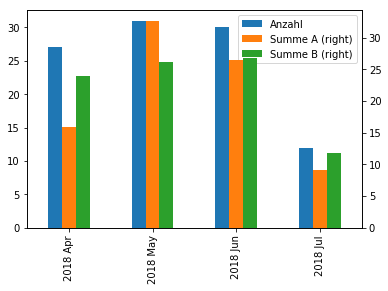

In [124]:
ax1 = to_plot.plot(kind="bar",secondary_y=['Summe A','Summe B'])
ax1.xaxis.set_ticklabels(to_plot.index.strftime('%Y %b'));
